In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('Temparature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
# checking for the shape of the dataset
df.shape

(7752, 25)

In [6]:
# check for the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


we have all float datatypes in the dataset

In [7]:
# dropping the Date column
df.drop('Date',axis=1,inplace=True)

In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
# fill all the null values with mean values of respective columns
df = df.fillna(df.mean())

In [10]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [12]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [13]:
corr = df.corr()

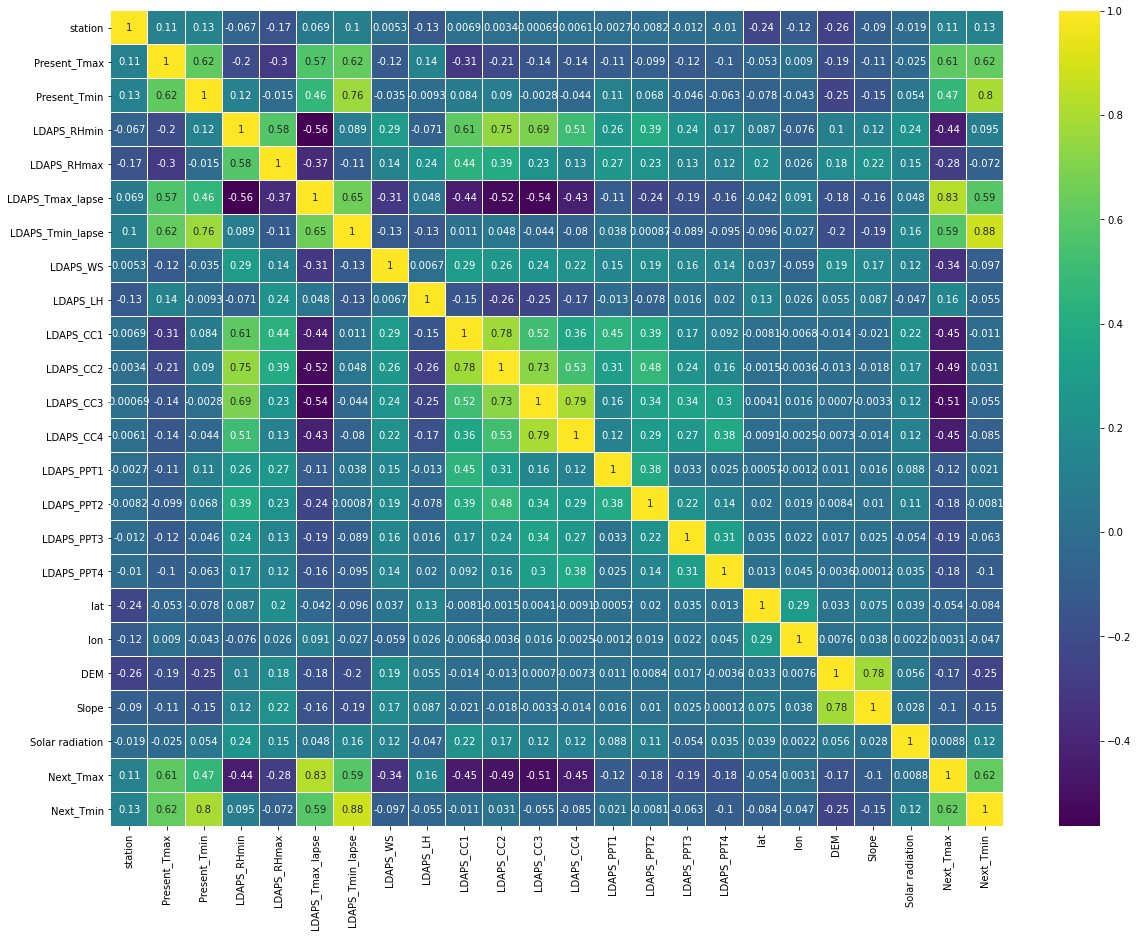

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,linewidth=0.1,linecolor='white',cmap='viridis');

In [16]:
corr['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128293
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_CC1          -0.011028
lon                -0.046603
LDAPS_CC3          -0.054726
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

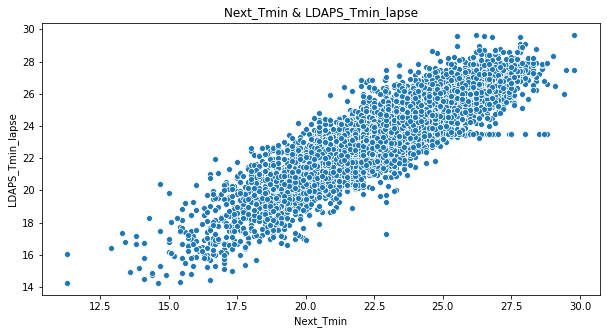

In [25]:
# checking for the correlation between Next_Tmin & LDAPS_Tmin_lapse
plt.figure(figsize=(10,5))
plt.title('Next_Tmin & LDAPS_Tmin_lapse')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_Tmin_lapse')
sns.scatterplot(df['Next_Tmin'],df['LDAPS_Tmin_lapse'])
plt.show()

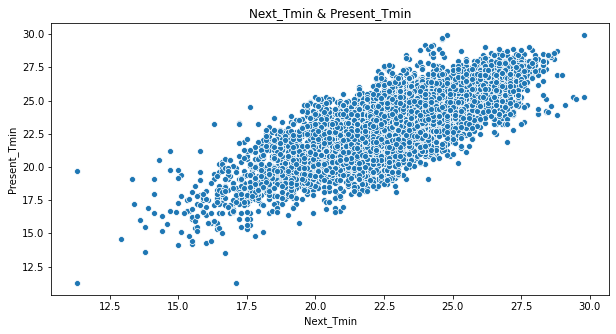

In [32]:
# checking for the correlation between Next_Tmin & Present_Tmin
plt.figure(figsize=(10,5))
plt.title('Next_Tmin & Present_Tmin')
plt.xlabel('Next_Tmin')
plt.ylabel('Present_Tmin')
sns.scatterplot(df['Next_Tmin'],df['Present_Tmin'])
plt.show()

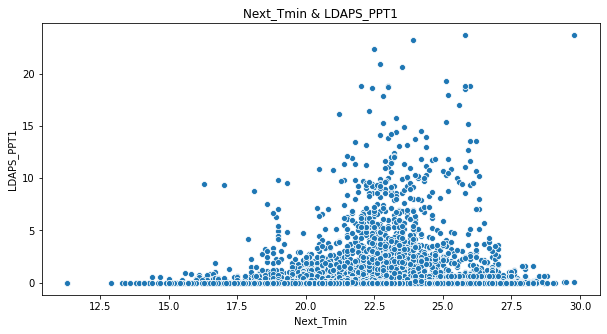

In [31]:
# checking for the correlation between Next_Tmin & LDAPS_PPT1
plt.figure(figsize=(10,5))
plt.title('Next_Tmin & LDAPS_PPT1')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_PPT1')
sns.scatterplot(df['Next_Tmin'],df['LDAPS_PPT1'])
plt.show()

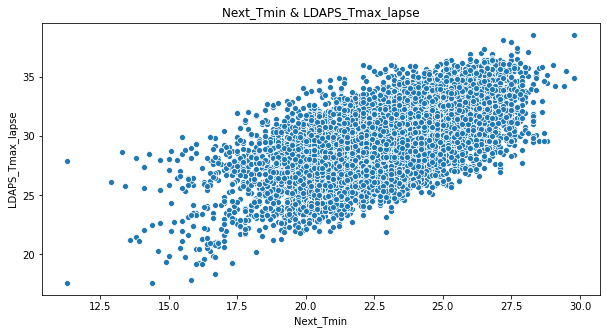

In [34]:
# checking for the correlation between Next_Tmin & LDAPS_Tmax_lapse 
plt.figure(figsize=(10,5))
plt.title('Next_Tmin & LDAPS_Tmax_lapse')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_Tmax_lapse ')
sns.scatterplot(df['Next_Tmin'],df['LDAPS_Tmax_lapse'])
plt.show()

In [35]:
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.107983
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
LDAPS_PPT1         -0.118817
DEM                -0.172538
LDAPS_PPT2         -0.178383
LDAPS_PPT4         -0.178718
LDAPS_PPT3         -0.194143
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
Name: Next_Tmax, dtype: float64

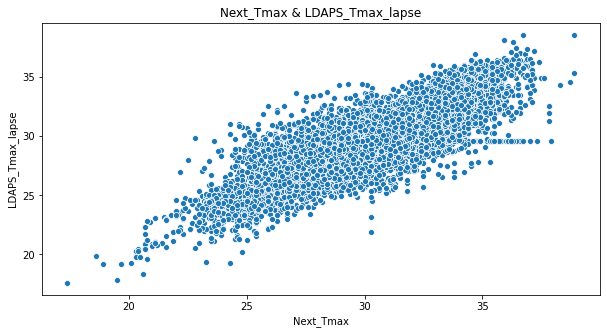

In [36]:
# checking for the correlation between Next_Tmax & LDAPS_Tmax_lapse 
plt.figure(figsize=(10,5))
plt.title('Next_Tmax & LDAPS_Tmax_lapse')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_Tmax_lapse ')
sns.scatterplot(df['Next_Tmax'],df['LDAPS_Tmax_lapse'])
plt.show()

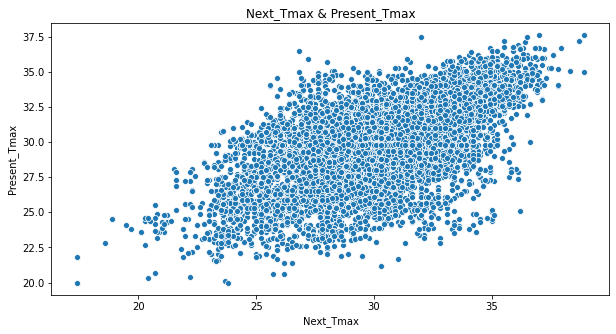

In [38]:
# checking for the correlation between Next_Tmax & Present_Tmax  
plt.figure(figsize=(10,5))
plt.title('Next_Tmax & Present_Tmax')
plt.xlabel('Next_Tmax')
plt.ylabel('Present_Tmax')
sns.scatterplot(df['Next_Tmax'],df['Present_Tmax'])
plt.show()

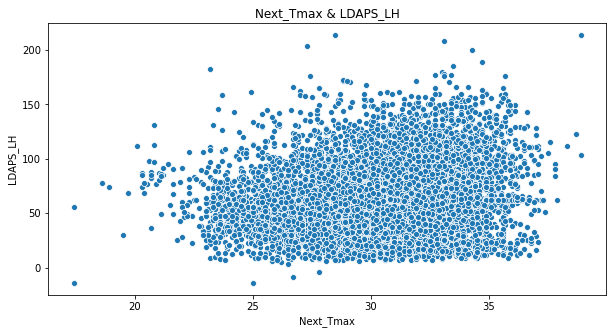

In [39]:
# checking for the correlation between Next_Tmax & LDAPS_LH  
plt.figure(figsize=(10,5))
plt.title('Next_Tmax & LDAPS_LH')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_LH')
sns.scatterplot(df['Next_Tmax'],df['LDAPS_LH'])
plt.show()

In [41]:
from sklearn.datasets import make_regression

x,y = make_regression(n_samples=7752, n_features=24, n_informative=5, n_targets=2, random_state=1, noise=0.5)

print(x.shape, y.shape)

(7752, 24) (7752, 2)


In [40]:
df.shape

(7752, 24)

In [42]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

x,y = make_regression(n_samples=7752, n_features=24, n_informative=5, n_targets=2, random_state=1, noise=0.5)

model = LinearRegression()

model.fit(x,y)

row = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -2820059, -0.00290545, 0.96402263, 0.04992249]

yhat = model.predict([row])

print(yhat[0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 24 is different from 10)